<a href="https://colab.research.google.com/github/fabiana-carneiro/machine-learning/blob/master/exercicio_pratico_I_IGTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 

Geracação de dataset

In [0]:
x, y = make_blobs(n_samples=500, centers=20, random_state=999)


Plotando o dataset gerado em um gráfico 

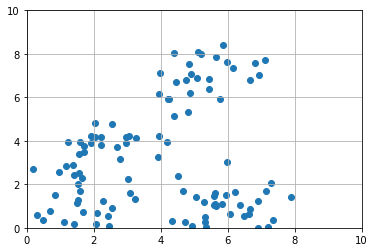

In [8]:
plt.scatter(x[:,0], x[:,1])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()

Utilizando algoritmo KMeans com um cluster e plotando grafico com o resultado

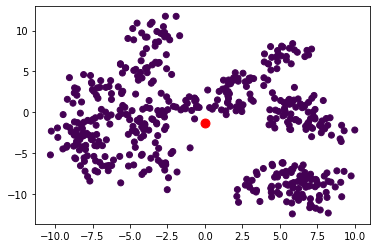

In [10]:
k_means = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = k_means.fit_predict(x)

plt.scatter(x[:,0], x[:,1], c =pred_y)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=80,c='red')
plt.show()

Printo do ponto central do cluster (centroide)

In [11]:
k_means.cluster_centers_

array([[ 0.02618523, -1.30384304]])

Soma dos quadrados intra-clusters (wcss) utilizando somente 1 cluster

In [12]:
k_means.inertia_

31547.372471390485

Executando algoritmo KMeans para o mesmo dataset, porém com 5 clusters

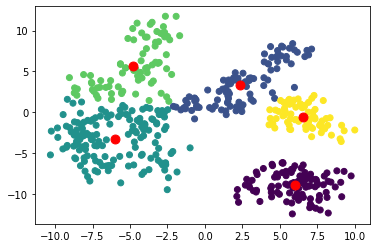

In [14]:
k_means = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = k_means.fit_predict(x)

plt.scatter(x[:,0], x[:,1], c =pred_y)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=80,c='red')
plt.show()

Soma dos quadrados intra-clusters (wcss) utilizando 5 clusters

In [15]:
k_means.inertia_

4717.404091931214

Soma dos quadrados intra-clusters rodando o KMeans alterando o cluster em valores de 1 a 20 para verificar a soma em cada iteração e plotando gráfico com vaores.

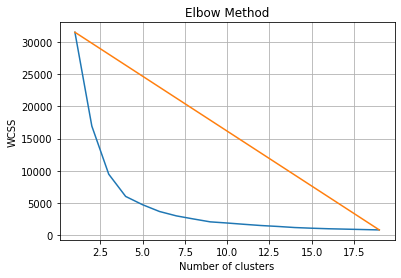

In [28]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


Função para verificar o número ideal de cluster para o dataset gerado



In [0]:
from math import sqrt

def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

Chamando a função criada passando as somas dos quadrados intracluster gerados nas 20 iterações para verificar qual seria o valor ideal de cluster para o dataset

In [32]:
optimal_number_of_clusters(wcss)

5